# Installing the required packages

In [ ]:
import pandas as pd
from sklearn import preprocessing
import numpy as np

import tensorflow as tf

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics

import matplotlib.pyplot as plt

In [ ]:
!pip install zeugma

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for zeugma: filename=zeugma-0.49-py3-none-any.whl size=8821 sha256=5b871d7921fb4db273b119de74564b4009ca7e73a9ad4f32feb4ea96716c1a9f
  Stored in directory: /root/.cache/pip/wheels/1d/47/5b/2a59a79706cc9340c72fd6a7bfc20e7ebcab849c88c38fdfa0
Successfully built zeugma


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GRU, Dropout, Bidirectional, SpatialDropout1D
from tensorflow.keras.utils import to_categorical

from sklearn import preprocessing

# Read Dataset

In [ ]:
main = pd.read_csv('/content/drive/MyDrive/Clickbait/Text_Dataset/Main_Dataset.csv')
val = pd.read_csv('/content/drive/MyDrive/Clickbait/Text_Dataset/Validation_Dataset.csv')

In [ ]:
df= main.append(val, ignore_index=True)

In [ ]:
df.head()

,postMedia,postText,id,targetCaptions,targetParagraphs,targetTitle,postTimestamp,targetKeywords,targetDescription,truthJudgments,truthMean,truthClass,truthMedian,truthMode
0,['media/photo_858153570478305281.jpg'],"[""Malls are dying, but it's hard to profit fro...",858153572571197440,[],['Lisa Abramowicz is a Bloomberg Gadfly column...,This Big Short Threatens to Be a Big Bust,Sat Apr 29 02:58:50 +0000 2017,"Infrastructure,Debt,Real Estate,Fund Manager,W...","The wager worked early on, but time is working...","[0.33333333330000003, 0.0, 0.6666666666000001,...",0.333333,no-clickbait,0.333333,0.333333
1,['media/photo_858137808657108992.jpg'],['The top 10 best selling comic books of all t...,858137811039465472,[],"['More', 'By Brian Prowse-Gany', 'In celebrati...",The top 10 best selling comic books of all tim...,Sat Apr 29 01:56:12 +0000 2017,NaN,"In celebration of National Superhero Day, Yaho...","[0.6666666666000001, 1.0, 1.0, 0.0, 1.0]",0.733333,clickbait,1.000000,1.000000
2,['media/photo_858069152451354625.jpg'],"['Players to know, QBs to watch and more 👀\n\n...",858070460814184448,['NFL Draft logo'],['The first round of the 2017 NFL draft was no...,B/R Presents: NFL1000 Guide to Day 2 of the 20...,Fri Apr 28 21:28:34 +0000 2017,"NFL Draft, NFL, Preview Prediction",The first round of the 2017 NFL draft was no...,"[1.0, 0.6666666666000001, 0.6666666666000001, ...",0.600000,clickbait,0.666667,0.666667
3,['media/photo_858033549995376641.jpg'],['Florida officials say no Zika virus has been...,858033553468252160,['PHOTO: A mosquito is pictured on a persons a...,"['With summer approaching, Florida health offi...",No Zika detected in Florida mosquitoes so far ...,Fri Apr 28 19:01:55 +0000 2017,"zika, florida, mosquitoes, health news, medica...","With summer approaching, officials are hoping ...","[0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,no-clickbait,0.000000,0.000000
4,['media/photo_857902230321725440.jpg'],['White House reporter @alivitali on her first...,857902233232527360,"['TODAY', 'Image: NBC News reporter Ali Vitali...",['The most consistent thing about my life for ...,My 100 Days of Covering President Donald Trump,Fri Apr 28 10:20:06 +0000 2017,NaN,"For the past 100 days, my ""office"" has been th...","[0.33333333330000003, 0.0, 0.6666666666000001,...",0.533333,clickbait,0.666667,0.666667


In [ ]:
text = df['targetTitle'].values         # Input Feature (Title of media posts)
labels = df['truthClass'].values        # Target Class/label

# Train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(text, labels,test_size=0.33, random_state=0)

In [ ]:
X_train

array(['5 travel credit card sign-up bonuses to fund your summer trip',
       '17 Limited-Edition Beauty Products You Need To Buy\xa0ASAP',
       'After Pre-Election Surge, Apprehensions at Southern Border Hit Five-Year Low',
       ...,
       '4 Ways Entrepreneurs Can Use Technology To Stay Fit On The Road',
       "Beliebers Can't Get Over Justin Bieber's Four Grammy Nominations: See Their Tweets",
       "Parents Welcome New Year's Twins Born Minutes Apart, in Different Years "],
      dtype=object)

# Glove Embedding

In [ ]:
from zeugma.embeddings import EmbeddingTransformer

glove = EmbeddingTransformer('glove')
X_train_glove = glove.transform(X_train)

In [ ]:
X_test_glove = glove.transform(X_test)

# Encoding Target Variable

In [ ]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 
y_train_en= label_encoder.fit_transform(y_train)

y_test_en = label_encoder.transform(y_test)

target_length = y_train_en.shape

In [ ]:
X_train.shape

(14206,)

In [ ]:
X_train_glove.shape

(14206, 25)

In [ ]:
#X_train_vect_avg=np.newaxis(X_train_vect_avg)
X_train_glove=np.array(X_train_glove)
X_train_glove = X_train_glove[:, np.newaxis]


In [ ]:
X_train_glove.shape

(14206, 1, 25)

# Bi-GRU

In [ ]:
model = Sequential()
model.add(Dense(100, activation='relu',input_shape=X_train_glove[0].shape)) 
#model.add(SpatialDropout1D(0.2))
model.add(Dropout(0.2))
model.add(Bidirectional(GRU(128)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1, 100)            2600      
                                                                 
 dropout_1 (Dropout)         (None, 1, 100)            0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              176640    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                      

In [ ]:
history = model.fit(X_train_glove, y_train_en, epochs=5, 
                    validation_split=0.3, 
                    batch_size=128, callbacks=[callback])

Epoch 1/5
78/78 [==============================] - 2s 26ms/step - loss: 0.4824 - accuracy: 0.7874 - val_loss: 0.4934 - val_accuracy: 0.7787
Epoch 2/5
78/78 [==============================] - 1s 13ms/step - loss: 0.4811 - accuracy: 0.7888 - val_loss: 0.4910 - val_accuracy: 0.7736
Epoch 3/5
78/78 [==============================] - 1s 14ms/step - loss: 0.4796 - accuracy: 0.7891 - val_loss: 0.4917 - val_accuracy: 0.7755


# Testing and Prediction

In [ ]:
X_test_glove=np.array(X_test_glove)
X_test_glove = X_test_glove[:, np.newaxis]

In [ ]:
# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test_glove)

219/219 [==============================] - 1s 2ms/step


In [ ]:
y_pred

array([[0.8996759],
       [0.6907985],
       [0.6907985],
       ...,
       [0.6907986],
       [0.6907986],
       [0.6907986]], dtype=float32)

In [ ]:
y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

# Metrics

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test_en, y_pred)
recall = recall_score(y_test_en, y_pred)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round((y_pred==y_test_en).sum()/len(y_pred), 3)))

Precision: 0.779 / Recall: 0.992 / Accuracy: 0.775


# Confusion Matrix

accuracy: 0.775


<Figure size 432x288 with 0 Axes>

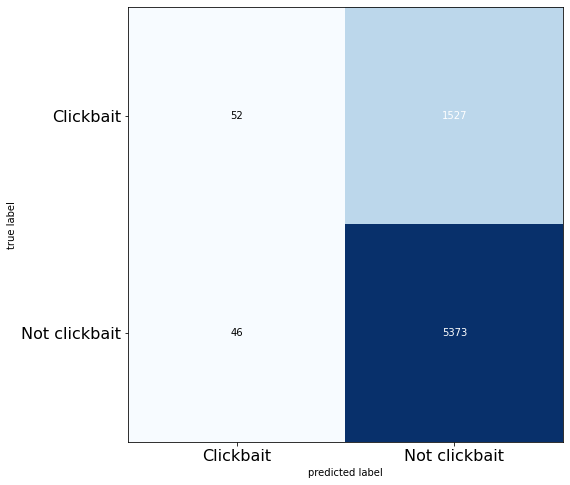

In [ ]:
accuracy=metrics.accuracy_score(y_test_en,y_pred)
print('accuracy: %0.3f'%accuracy)
cm=metrics.confusion_matrix(y_test_en, y_pred)
#plot_confusion_matrix(cm , classes=['FAKE','TRUE'])
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(2), ['Clickbait','Not clickbait'], fontsize=16)
plt.yticks(range(2), ['Clickbait','Not clickbait'], fontsize=16)
plt.show()

# Accuracy Plot

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_en, y_pred, target_names=['Clickbait','Not clickbait']))

               precision    recall  f1-score   support

    Clickbait       0.53      0.03      0.06      1579
Not clickbait       0.78      0.99      0.87      5419

     accuracy                           0.78      6998
    macro avg       0.65      0.51      0.47      6998
 weighted avg       0.72      0.78      0.69      6998

